In [ ]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install geopandas matplotlib jenkspy


In [ ]:
pip install matplotlib-scalebar


In [ ]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections
import torch
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar

from scipy.cluster.vq import kmeans2, whiten
from scipy.spatial.distance import cdist

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023LIME_escooter/escooter2023_trajectory_hourly_count.shp"
gdf = gpd.read_file(drivepath)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023LIME_bike/limebike2023_trajectory_hourly_count.shp"
gdf2 = gpd.read_file(drivepath)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023capitalbike/capitalbike2023_trajectory_hourly_count.shp"
gdf3 = gpd.read_file(drivepath)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023Allyear_strava/strava2023_trajectory_hourly_count.shp"
gdf4 = gpd.read_file(drivepath)

In [ ]:
LS=gdf

In [ ]:
LB=gdf2

In [ ]:
CB=gdf3

In [ ]:
ST=gdf4

In [ ]:
import geopandas as gpd
import pandas as pd


gdf = gdf.rename(columns={col: f'LS_{col}' for col in gdf.columns if col != 'geometry'})

gdf2 = gdf2.rename(columns={col: f'LB_{col}' for col in gdf2.columns if col != 'geometry'})

gdf3 = gdf3.rename(columns={col: f'CB_{col}' for col in gdf3.columns if col != 'geometry'})

gdf4 = gdf4.rename(columns={col: f'ST_{col}' for col in gdf4.columns if col != 'geometry'})

geometry = gdf['geometry']

gdf = gdf.drop(columns=['geometry'])
gdf2 = gdf2.drop(columns=['geometry'])
gdf3 = gdf3.drop(columns=['geometry'])
gdf4 = gdf4.drop(columns=['geometry'])

merged_df = pd.concat([gdf, gdf2, gdf3, gdf4], axis=1)
merged_gdf = gpd.GeoDataFrame(merged_df, geometry=geometry)


In [ ]:
merged_gdf.to_file("four_modes.geojson", driver='GeoJSON')

In [ ]:
gdf=merged_gdf

In [ ]:
gdf.shape

(13817, 965)

In [ ]:
batch_size = 100
for i in range(0, len(gdf.columns), batch_size):
    print(gdf.columns[i:i+batch_size])


Index(['LS_ID', 'LS_All_D_0', 'LS_All_D_1', 'LS_All_D_2', 'LS_All_D_3',
       'LS_All_D_4', 'LS_All_D_5', 'LS_All_D_6', 'LS_All_D_7', 'LS_All_D_8',
       'LS_All_D_9', 'LS_All_D_10', 'LS_All_D_11', 'LS_All_D_12',
       'LS_All_D_13', 'LS_All_D_14', 'LS_All_D_15', 'LS_All_D_16',
       'LS_All_D_17', 'LS_All_D_18', 'LS_All_D_19', 'LS_All_D_20',
       'LS_All_D_21', 'LS_All_D_22', 'LS_All_D_23', 'LS_All_Y_0', 'LS_All_Y_1',
       'LS_All_Y_2', 'LS_All_Y_3', 'LS_All_Y_4', 'LS_All_Y_5', 'LS_All_Y_6',
       'LS_All_Y_7', 'LS_All_Y_8', 'LS_All_Y_9', 'LS_All_Y_10', 'LS_All_Y_11',
       'LS_All_Y_12', 'LS_All_Y_13', 'LS_All_Y_14', 'LS_All_Y_15',
       'LS_All_Y_16', 'LS_All_Y_17', 'LS_All_Y_18', 'LS_All_Y_19',
       'LS_All_Y_20', 'LS_All_Y_21', 'LS_All_Y_22', 'LS_All_Y_23', 'LS_Wi_D_0',
       'LS_Wi_D_1', 'LS_Wi_D_2', 'LS_Wi_D_3', 'LS_Wi_D_4', 'LS_Wi_D_5',
       'LS_Wi_D_6', 'LS_Wi_D_7', 'LS_Wi_D_8', 'LS_Wi_D_9', 'LS_Wi_D_10',
       'LS_Wi_D_11', 'LS_Wi_D_12', 'LS_Wi_D_13', 'LS_Wi_

In [ ]:
import geopandas as gpd

gdf['LS_D1'] = gdf[['LS_All_D_6', 'LS_All_D_7', 'LS_All_D_8', 'LS_All_D_9', 'LS_All_D_10']].sum(axis=1)
gdf['LS_D2'] = gdf[['LS_All_D_11', 'LS_All_D_12', 'LS_All_D_13', 'LS_All_D_14', 'LS_All_D_15']].sum(axis=1)
gdf['LS_D3'] = gdf[['LS_All_D_16', 'LS_All_D_17', 'LS_All_D_18', 'LS_All_D_19', 'LS_All_D_20']].sum(axis=1)
gdf['LS_D4'] = gdf[['LS_All_D_21', 'LS_All_D_22', 'LS_All_D_23', 'LS_All_D_0', 'LS_All_D_1']].sum(axis=1)

gdf['LS_Y1'] = gdf[['LS_All_Y_6', 'LS_All_Y_7', 'LS_All_Y_8', 'LS_All_Y_9', 'LS_All_Y_10']].sum(axis=1)
gdf['LS_Y2'] = gdf[['LS_All_Y_11', 'LS_All_Y_12', 'LS_All_Y_13', 'LS_All_Y_14', 'LS_All_Y_15']].sum(axis=1)
gdf['LS_Y3'] = gdf[['LS_All_Y_16', 'LS_All_Y_17', 'LS_All_Y_18', 'LS_All_Y_19', 'LS_All_Y_20']].sum(axis=1)
gdf['LS_Y4'] = gdf[['LS_All_Y_21', 'LS_All_Y_22', 'LS_All_Y_23', 'LS_All_Y_0', 'LS_All_Y_1']].sum(axis=1)

gdf['LB_D1'] = gdf[['LB_All_D_6', 'LB_All_D_7', 'LB_All_D_8', 'LB_All_D_9', 'LB_All_D_10']].sum(axis=1)
gdf['LB_D2'] = gdf[['LB_All_D_11', 'LB_All_D_12', 'LB_All_D_13', 'LB_All_D_14', 'LB_All_D_15']].sum(axis=1)
gdf['LB_D3'] = gdf[['LB_All_D_16', 'LB_All_D_17', 'LB_All_D_18', 'LB_All_D_19', 'LB_All_D_20']].sum(axis=1)
gdf['LB_D4'] = gdf[['LB_All_D_21', 'LB_All_D_22', 'LB_All_D_23', 'LB_All_D_0', 'LB_All_D_1']].sum(axis=1)

gdf['LB_Y1'] = gdf[['LB_All_Y_6', 'LB_All_Y_7', 'LB_All_Y_8', 'LB_All_Y_9', 'LB_All_Y_10']].sum(axis=1)
gdf['LB_Y2'] = gdf[['LB_All_Y_11', 'LB_All_Y_12', 'LB_All_Y_13', 'LB_All_Y_14', 'LB_All_Y_15']].sum(axis=1)
gdf['LB_Y3'] = gdf[['LB_All_Y_16', 'LB_All_Y_17', 'LB_All_Y_18', 'LB_All_Y_19', 'LB_All_Y_20']].sum(axis=1)
gdf['LB_Y4'] = gdf[['LB_All_Y_21', 'LB_All_Y_22', 'LB_All_Y_23', 'LB_All_Y_0', 'LB_All_Y_1']].sum(axis=1)

gdf['CB_D1'] = gdf[['CB_All_D_6', 'CB_All_D_7', 'CB_All_D_8', 'CB_All_D_9', 'CB_All_D_10']].sum(axis=1)
gdf['CB_D2'] = gdf[['CB_All_D_11', 'CB_All_D_12', 'CB_All_D_13', 'CB_All_D_14', 'CB_All_D_15']].sum(axis=1)
gdf['CB_D3'] = gdf[['CB_All_D_16', 'CB_All_D_17', 'CB_All_D_18', 'CB_All_D_19', 'CB_All_D_20']].sum(axis=1)
gdf['CB_D4'] = gdf[['CB_All_D_21', 'CB_All_D_22', 'CB_All_D_23', 'CB_All_D_0', 'CB_All_D_1']].sum(axis=1)

gdf['CB_Y1'] = gdf[['CB_All_Y_6', 'CB_All_Y_7', 'CB_All_Y_8', 'CB_All_Y_9', 'CB_All_Y_10']].sum(axis=1)
gdf['CB_Y2'] = gdf[['CB_All_Y_11', 'CB_All_Y_12', 'CB_All_Y_13', 'CB_All_Y_14', 'CB_All_Y_15']].sum(axis=1)
gdf['CB_Y3'] = gdf[['CB_All_Y_16', 'CB_All_Y_17', 'CB_All_Y_18', 'CB_All_Y_19', 'CB_All_Y_20']].sum(axis=1)
gdf['CB_Y4'] = gdf[['CB_All_Y_21', 'CB_All_Y_22', 'CB_All_Y_23', 'CB_All_Y_0', 'CB_All_Y_1']].sum(axis=1)


gdf['ST_D1'] = gdf[['ST_All_D_6', 'ST_All_D_7', 'ST_All_D_8', 'ST_All_D_9', 'ST_All_D_10']].sum(axis=1)
gdf['ST_D2'] = gdf[['ST_All_D_11', 'ST_All_D_12', 'ST_All_D_13', 'ST_All_D_14', 'ST_All_D_15']].sum(axis=1)
gdf['ST_D3'] = gdf[['ST_All_D_16', 'ST_All_D_17', 'ST_All_D_18', 'ST_All_D_19', 'ST_All_D_20']].sum(axis=1)
gdf['ST_D4'] = gdf[['ST_All_D_21', 'ST_All_D_22', 'ST_All_D_23', 'ST_All_D_0', 'ST_All_D_1']].sum(axis=1)

gdf['ST_Y1'] = gdf[['ST_All_Y_6', 'ST_All_Y_7', 'ST_All_Y_8', 'ST_All_Y_9', 'ST_All_Y_10']].sum(axis=1)
gdf['ST_Y2'] = gdf[['ST_All_Y_11', 'ST_All_Y_12', 'ST_All_Y_13', 'ST_All_Y_14', 'ST_All_Y_15']].sum(axis=1)
gdf['ST_Y3'] = gdf[['ST_All_Y_16', 'ST_All_Y_17', 'ST_All_Y_18', 'ST_All_Y_19', 'ST_All_Y_20']].sum(axis=1)
gdf['ST_Y4'] = gdf[['ST_All_Y_21', 'ST_All_Y_22', 'ST_All_Y_23', 'ST_All_Y_0', 'ST_All_Y_1']].sum(axis=1)



new_gdf = gdf[['LS_D1', 'LS_D2', 'LS_D3', 'LS_D4','LB_D1', 'LB_D2', 'LB_D3', 'LB_D4','ST_D1', 'ST_D2', 'ST_D3', 'ST_D4','CB_D1', 'CB_D2', 'CB_D3', 'CB_D4','LS_Y1', 'LS_Y2', 'LS_Y3', 'LS_Y4', 'LB_Y1', 'LB_Y2', 'LB_Y3', 'LB_Y4', 'ST_Y1', 'ST_Y2', 'ST_Y3', 'ST_Y4', 'CB_Y1', 'CB_Y2', 'CB_Y3', 'CB_Y4', 'geometry']]
new_drivepath = "four_modes_8period.geojson"
new_gdf.to_file(new_drivepath, driver='GeoJSON')



新的GeoJSON文件已保存: /content/drive/MyDrive/Colab Notebooks/Dan/four_modes_8period.geojson


In [ ]:
gdf3=new_gdf

LS_D1  LS_D2  LS_D3  LS_D4  LB_D1  LB_D2  LB_D3  LB_D4  ST_D1  ST_D2  \
0         19     30     16     15      6     10      6     13      8      2   
1       2036   5664   5317   4233   1161   2899   2299   1452      5      2   
2         79    205    195    156     51     79     79     54      1      3   
3         11     45     30      9      2      9     21      7      0      0   
4          2      6      7      4      2      2      2      5      4      2   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13812    163    276    225    201    100    173    157    103     35      9   
13813     15     36     36     22     18     35     33     10      3      1   
13814      4     11      7      4      5      4      4      4      0      0   
13815   1135   3680   4459   2408    430   1291   1452    774      9      0   
13816      6     30     38     30      0      3      5      2      0      0   

       ...  LB_Y4  ST_Y1  ST_Y2  ST_Y3  ST_Y4  CB_Y1  CB_Y2  CB_Y3  CB_Y4  \
0      ...      8      4      2      4      0    136    201    333     71   
1      ...   3062      5      1     10      0  42957  29831  58567  13019   
2      ...     96     10      6      9      0    448    436    673    231   
3      ...      8      0      0      0      0      0      0      0      0   
4      ...      3      4      1     10      0     98    102    179     33   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13812  ...    275      7      6      2      0    549    594    799    453   
13813  ...     27      0      1      0      0     86     70    111     23   
13814  ...     20      0      0      0      0     52    103     96     21   
13815  ...   1529      6      3      9      0  12707  13433  24097   5300   
13816  ...      3      1      0      1      0      0      0      0      0   

                                                geometry  
0      LINESTRING Z (397105.011 146144.556 0, 397094....  
1      LINESTRING Z (396929.591 137710.495 0, 396929....  
2      LINESTRING Z (396634.181 140701.755 0, 396634....  
3      LINESTRING Z (391818.71 139157.575 0, 391818.7...  
4      LINESTRING Z (396852.843 146890.302 0, 396853....  
...                                                  ...  
13812  LINESTRING Z (402463.222 133927.184 0, 402445....  
13813  LINESTRING Z (403428.453 132666.934 0, 403437....  
13814  LINESTRING Z (400032.062 128534.903 0, 400049....  
13815  LINESTRING Z (398472.107 134293.336 0, 398474....  
13816  LINESTRING Z (399959.172 130971.763 0, 399953....  

[13817 rows x 33 columns]

In [ ]:
gdf3 = gdf3.drop(index=5242)

Rows with sum_LS equal to 0: 0
Empty GeoDataFrame
Columns: [LS_D1, LS_D2, LS_D3, LS_D4, LB_D1, LB_D2, LB_D3, LB_D4, ST_D1, ST_D2, ST_D3, ST_D4, CB_D1, CB_D2, CB_D3, CB_D4, LS_Y1, LS_Y2, LS_Y3, LS_Y4, LB_Y1, LB_Y2, LB_Y3, LB_Y4, ST_Y1, ST_Y2, ST_Y3, ST_Y4, CB_Y1, CB_Y2, CB_Y3, CB_Y4, geometry, sum_LS, sum_LS_category, C_simi_LS, C_simi_LS_category, color]
Index: []

[0 rows x 38 columns]


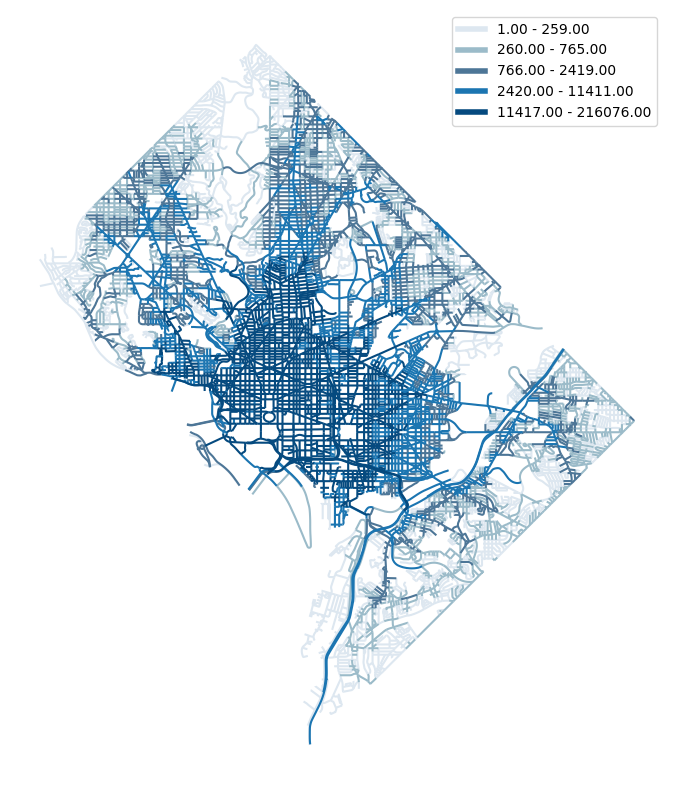

Category 0: Count = 2706, Value Range = [1.00, 259.00]
Category 1: Count = 2701, Value Range = [260.00, 765.00]
Category 2: Count = 2701, Value Range = [766.00, 2419.00]
Category 3: Count = 2703, Value Range = [2420.00, 11411.00]
Category 4: Count = 2703, Value Range = [11417.00, 216076.00]


In [ ]:
gdf3['sum_LS'] = gdf3[['LS_D1', 'LS_D2', 'LS_D3', 'LS_D4',
           'LS_Y1', 'LS_Y2', 'LS_Y3', 'LS_Y4']].sum(axis=1)

zero_rows = gdf3[gdf3['sum_LS'] == 0]
print(f"Rows with sum_LS equal to 0: {len(zero_rows)}")
print(zero_rows)

gdf3 = gdf3[gdf3['sum_LS'] != 0].copy()

# Compute quantile breaks
quantiles = gdf3['sum_LS'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf3['sum_LS_category'] = pd.cut(gdf3['sum_LS'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#dde7f0',
    1: '#9bbbc9',
    2: '#4d7697',
    3: '#1b75b1',
    4: '#054a7f'
}

# Compute the value range for each category
category_stats = []
for category in range(5):
    count = gdf3[gdf3['sum_LS_category'] == category].shape[0]
    min_value = gdf3[gdf3['sum_LS_category'] == category]['sum_LS'].min()
    max_value = gdf3[gdf3['sum_LS_category'] == category]['sum_LS'].max()
    category_stats.append((category, count, min_value, max_value))

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    category_data = gdf3[gdf3['sum_LS_category'] == category]
    category_label = f'{category_stats[category][2]:.2f} - {category_stats[category][3]:.2f}'
    category_data.plot(ax=ax, color=color, label=category_label)

# # Add scale bar
# scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
# ax.add_artist(scalebar)

# Remove coordinate borders
ax.axis('off')

# Create custom legend
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by sum_LS categories using Quantiles')
plt.show()

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value:.2f}, {max_value:.2f}]")

In [ ]:
gdf3

LS_D1  LS_D2  LS_D3  LS_D4  LB_D1  LB_D2  LB_D3  LB_D4  ST_D1  ST_D2  \
0         19     30     16     15      6     10      6     13      8      2   
1       2036   5664   5317   4233   1161   2899   2299   1452      5      2   
2         79    205    195    156     51     79     79     54      1      3   
3         11     45     30      9      2      9     21      7      0      0   
4          2      6      7      4      2      2      2      5      4      2   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13812    163    276    225    201    100    173    157    103     35      9   
13813     15     36     36     22     18     35     33     10      3      1   
13814      4     11      7      4      5      4      4      4      0      0   
13815   1135   3680   4459   2408    430   1291   1452    774      9      0   
13816      6     30     38     30      0      3      5      2      0      0   

       ...  ST_Y2  ST_Y3  ST_Y4  CB_Y1  CB_Y2  CB_Y3  CB_Y4  \
0      ...      2      4      0    136    201    333     71   
1      ...      1     10      0  42957  29831  58567  13019   
2      ...      6      9      0    448    436    673    231   
3      ...      0      0      0      0      0      0      0   
4      ...      1     10      0     98    102    179     33   
...    ...    ...    ...    ...    ...    ...    ...    ...   
13812  ...      6      2      0    549    594    799    453   
13813  ...      1      0      0     86     70    111     23   
13814  ...      0      0      0     52    103     96     21   
13815  ...      3      9      0  12707  13433  24097   5300   
13816  ...      0      1      0      0      0      0      0   

                                                geometry  sum_LS  \
0      LINESTRING Z (397105.011 146144.556 0, 397094....     278   
1      LINESTRING Z (396929.591 137710.495 0, 396929....   58997   
2      LINESTRING Z (396634.181 140701.755 0, 396634....    2338   
3      LINESTRING Z (391818.71 139157.575 0, 391818.7...     309   
4      LINESTRING Z (396852.843 146890.302 0, 396853....      73   
...                                                  ...     ...   
13812  LINESTRING Z (402463.222 133927.184 0, 402445....    3248   
13813  LINESTRING Z (403428.453 132666.934 0, 403437....     404   
13814  LINESTRING Z (400032.062 128534.903 0, 400049....     103   
13815  LINESTRING Z (398472.107 134293.336 0, 398474....   33760   
13816  LINESTRING Z (399959.172 130971.763 0, 399953....     612   

       sum_LS_category  
0                    1  
1                    4  
2                    2  
3                    1  
4                    0  
...                ...  
13812                3  
13813                1  
13814                0  
13815                4  
13816                1  

[13514 rows x 35 columns]

In [ ]:
gdf=gdf3

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


columns = ['LS_D1', 'LS_D2', 'LS_D3', 'LS_D4',
           'LS_Y1', 'LS_Y2', 'LS_Y3', 'LS_Y4'
           ]

data = gdf[columns]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

cosine_sim_matrix = cosine_similarity(normalized_data)

C_similarity = cosine_sim_matrix.sum(axis=1) - 1

gdf['C_simi_LS'] = C_similarity


Category 0: Count = 2704, Value Range = [3185.9175403984805, 12003.82068353041]
Category 1: Count = 2702, Value Range = [12003.853481531081, 12414.23425384978]
Category 2: Count = 2702, Value Range = [12414.435712998074, 12595.552968283413]
Category 3: Count = 2703, Value Range = [12595.554039465356, 12703.50758080346]
Category 4: Count = 2703, Value Range = [12703.523940815614, 12816.341681880707]


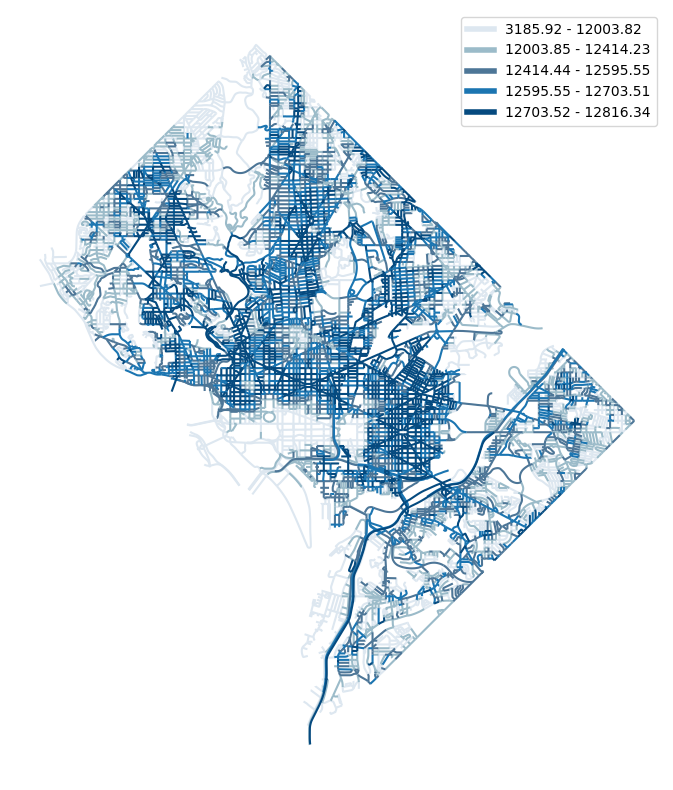

In [ ]:
# Compute quantile breaks
quantiles = gdf3['C_simi_LS'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf3['C_simi_LS_category'] = pd.cut(gdf3['C_simi_LS'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#dde7f0',
    1: '#9bbbc9',
    2: '#4d7697',
    3: '#1b75b1',
    4: '#054a7f'
}

# Display the count and value range for each category
category_stats = []
for category in range(5):
    count = gdf3[gdf3['C_simi_LS_category'] == category].shape[0]
    min_value = gdf3[gdf3['C_simi_LS_category'] == category]['C_simi_LS'].min()
    max_value = gdf3[gdf3['C_simi_LS_category'] == category]['C_simi_LS'].max()
    category_stats.append((category, count, min_value, max_value))

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value}, {max_value}]")

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    gdf3[gdf3['C_simi_LS_category'] == category].plot(ax=ax, color=color, label=f'Category {category}')

# Add scale bar
# scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
# ax.add_artist(scalebar)

# Remove coordinate borders
ax.axis('off')

legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by C_simi_LS categories using Quantiles')
plt.show()



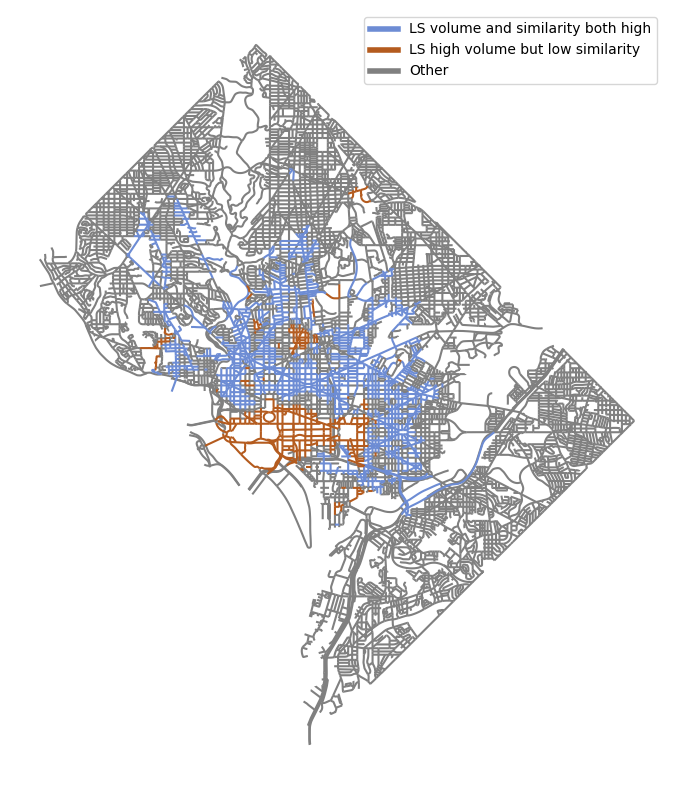

Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): 2100
Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): 469


In [ ]:
sum_LS_quantiles20 = gdf3['sum_LS'].quantile([0.3]).values[0]
sum_LS_quantiles80 = gdf3['sum_LS'].quantile([0.7]).values[0]
C_simi_LS_quantiles_20 = gdf3['C_simi_LS'].quantile([0.3]).values[0]
C_simi_LS_quantiles_80 = gdf3['C_simi_LS'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_LS'] >= sum_LS_quantiles80 and row['C_simi_LS'] >= C_simi_LS_quantiles_80:
        return '#6d8cd4'
    elif row['sum_LS'] >= sum_LS_quantiles80 and row['C_simi_LS'] <= C_simi_LS_quantiles_20:
        return '#b45b1e'
    else:
        return 'gray'

gdf3['color'] = gdf3.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf3['color'].unique():
    gdf3[gdf3['color'] == color].plot(ax=ax, color=color, label=color)

# Remove coordinate borders
ax.axis('off')
legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='LS volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='LS high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]

ax.legend(handles=legend_elements)
# plt.title('Geometry colored by specific conditions')
plt.show()


count_blue = gdf3[gdf3['color'] == '#6d8cd4'].shape[0]
count_red = gdf3[gdf3['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): {count_blue}")
print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): {count_red}")

In [ ]:
drivepath = "four_modes_8period.geojson"
gdf = gpd.read_file(drivepath)

Rows with sum_LB equal to 0: 0
Empty GeoDataFrame
Columns: [LS_D1, LS_D2, LS_D3, LS_D4, LB_D1, LB_D2, LB_D3, LB_D4, ST_D1, ST_D2, ST_D3, ST_D4, CB_D1, CB_D2, CB_D3, CB_D4, LS_Y1, LS_Y2, LS_Y3, LS_Y4, LB_Y1, LB_Y2, LB_Y3, LB_Y4, ST_Y1, ST_Y2, ST_Y3, ST_Y4, CB_Y1, CB_Y2, CB_Y3, CB_Y4, geometry, sum_LB, sum_LB_category]
Index: []

[0 rows x 35 columns]


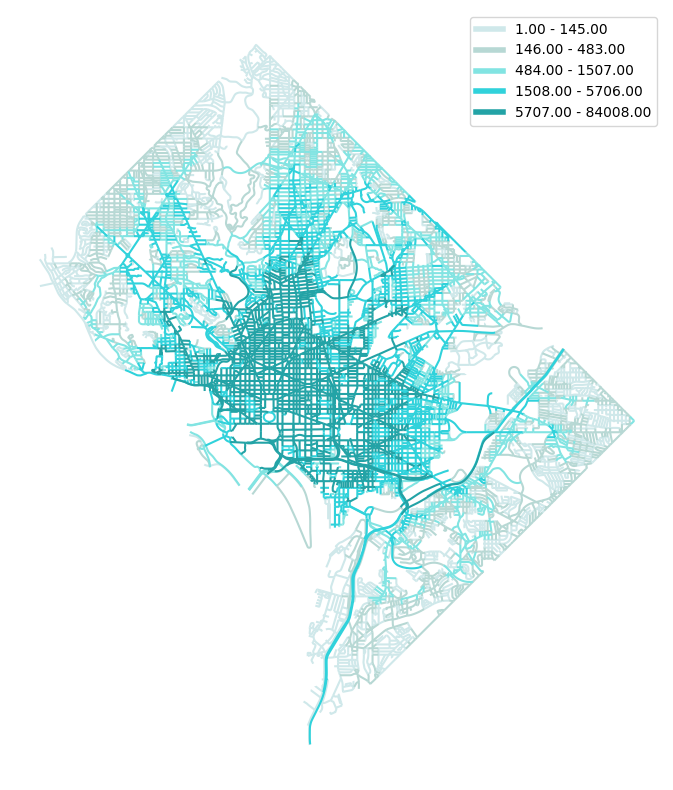

Category 0: Count = 2699, Value Range = [1.00, 145.00]
Category 1: Count = 2697, Value Range = [146.00, 483.00]
Category 2: Count = 2691, Value Range = [484.00, 1507.00]
Category 3: Count = 2698, Value Range = [1508.00, 5706.00]
Category 4: Count = 2694, Value Range = [5707.00, 84008.00]


In [ ]:

gdf['sum_LB'] = gdf[['LB_D1', 'LB_D2', 'LB_D3', 'LB_D4',
           'LB_Y1', 'LB_Y2', 'LB_Y3', 'LB_Y4']].sum(axis=1)


zero_rows = gdf[gdf['sum_LB'] == 0]
print(f"Rows with sum_LB equal to 0: {len(zero_rows)}")
print(zero_rows)


gdf = gdf[gdf['sum_LB'] != 0].copy()

# Compute quantile breaks
quantiles = gdf['sum_LB'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['sum_LB_category'] = pd.cut(gdf['sum_LB'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#cfe8ea',
    1: '#b7d8d4',
    2: '#82e4e2',
    3: '#30d2db',
    4: '#23a3a6'
}

# Compute the value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['sum_LB_category'] == category].shape[0]
    min_value = gdf[gdf['sum_LB_category'] == category]['sum_LB'].min()
    max_value = gdf[gdf['sum_LB_category'] == category]['sum_LB'].max()
    category_stats.append((category, count, min_value, max_value))

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    category_data = gdf[gdf['sum_LB_category'] == category]
    category_label = f'{category_stats[category][2]:.2f} - {category_stats[category][3]:.2f}'
    category_data.plot(ax=ax, color=color, label=category_label)
# Remove coordinate borders
ax.axis('off')
# Create custom legend
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by sum_LB categories using Quantiles')
plt.show()

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value:.2f}, {max_value:.2f}]")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


columns = ['LB_D1', 'LB_D2', 'LB_D3', 'LB_D4',
           'LB_Y1', 'LB_Y2', 'LB_Y3', 'LB_Y4'
           ]

data = gdf[columns]


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)


cosine_sim_matrix = cosine_similarity(normalized_data)


C_similarity = cosine_sim_matrix.sum(axis=1) - 1


gdf['C_simi_LB'] = C_similarity


Category 0: Count = 2697, Value Range = [3680.514282738065, 11624.642939410533]
Category 1: Count = 2695, Value Range = [11624.667474076108, 12182.241016560478]
Category 2: Count = 2695, Value Range = [12182.532678504394, 12402.700661892044]
Category 3: Count = 2696, Value Range = [12402.755299550809, 12518.610528422492]
Category 4: Count = 2696, Value Range = [12518.633016826345, 12635.090737758059]


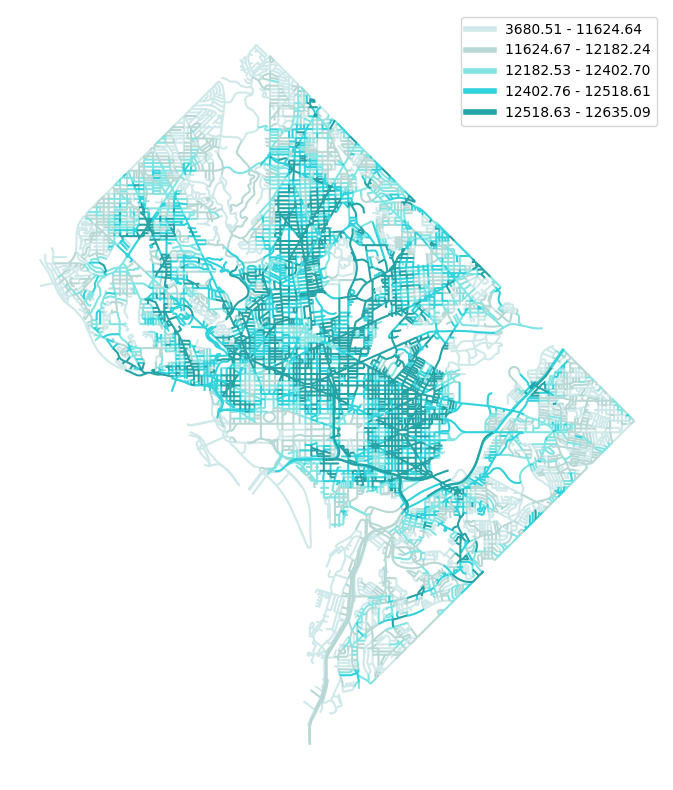

In [ ]:
# Compute quantile breaks
quantiles = gdf['C_simi_LB'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['C_simi_LB_category'] = pd.cut(gdf['C_simi_LB'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#cfe8ea',
    1: '#b7d8d4',
    2: '#82e4e2',
    3: '#30d2db',
    4: '#23a3a6'
}

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    gdf[gdf['C_simi_LB_category'] == category].plot(ax=ax, color=color, label=f'Category {category}')


# Display the count and value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['C_simi_LB_category'] == category].shape[0]
    min_value = gdf[gdf['C_simi_LB_category'] == category]['C_simi_LB'].min()
    max_value = gdf[gdf['C_simi_LB_category'] == category]['C_simi_LB'].max()
    category_stats.append((category, count, min_value, max_value))
# Remove coordinate borders
ax.axis('off')
# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value}, {max_value}]")

legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by C_simi_LB categories using Quantiles')
plt.show()



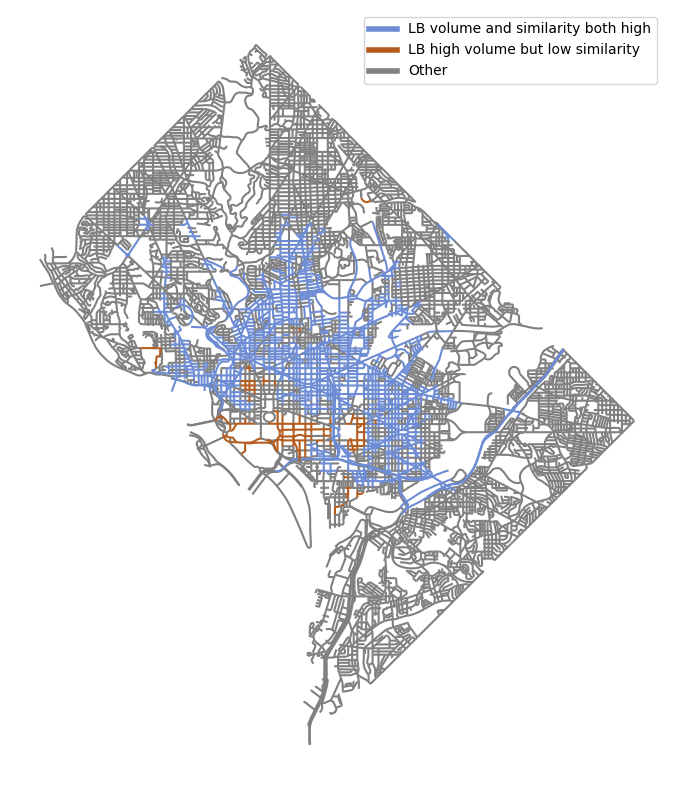

Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): 2554
Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): 164


In [ ]:
sum_LB_quantiles20 = gdf['sum_LB'].quantile([0.3]).values[0]
sum_LB_quantiles80 = gdf['sum_LB'].quantile([0.7]).values[0]
C_simi_LB_quantiles_20 = gdf['C_simi_LB'].quantile([0.3]).values[0]
C_simi_LB_quantiles_80 = gdf['C_simi_LB'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_LB'] >= sum_LB_quantiles80 and row['C_simi_LB'] >= C_simi_LB_quantiles_80:
        return '#6d8cd4'
    elif row['sum_LB'] >= sum_LB_quantiles80 and row['C_simi_LB'] <= C_simi_LB_quantiles_20:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='LB volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='LB high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
# Remove coordinate borders
ax.axis('off')
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by specific conditions')
plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): {count_blue}")
print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): {count_red}")


In [ ]:
drivepath = "four_modes_8period.geojson"
gdf = gpd.read_file(drivepath)

Rows with sum_CB equal to 0: 0
Empty GeoDataFrame
Columns: [LS_D1, LS_D2, LS_D3, LS_D4, LB_D1, LB_D2, LB_D3, LB_D4, ST_D1, ST_D2, ST_D3, ST_D4, CB_D1, CB_D2, CB_D3, CB_D4, LS_Y1, LS_Y2, LS_Y3, LS_Y4, LB_Y1, LB_Y2, LB_Y3, LB_Y4, ST_Y1, ST_Y2, ST_Y3, ST_Y4, CB_Y1, CB_Y2, CB_Y3, CB_Y4, geometry, sum_CB, sum_CB_category]
Index: []

[0 rows x 35 columns]


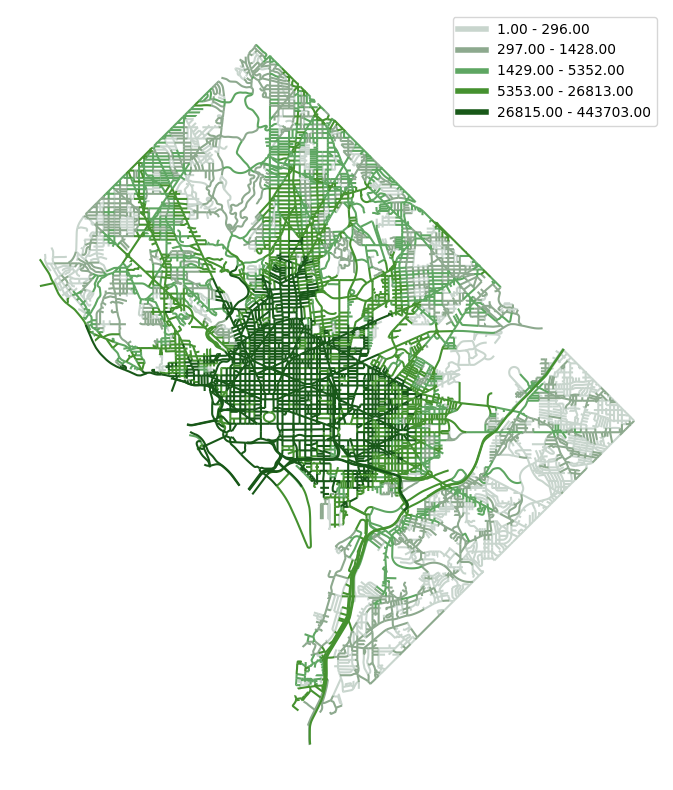

Category 0: Count = 2531, Value Range = [1.00, 296.00]
Category 1: Count = 2529, Value Range = [297.00, 1428.00]
Category 2: Count = 2526, Value Range = [1429.00, 5352.00]
Category 3: Count = 2527, Value Range = [5353.00, 26813.00]
Category 4: Count = 2528, Value Range = [26815.00, 443703.00]


In [ ]:
gdf['sum_CB'] = gdf[['CB_D1', 'CB_D2', 'CB_D3', 'CB_D4',
           'CB_Y1', 'CB_Y2', 'CB_Y3', 'CB_Y4']].sum(axis=1)

zero_rows = gdf[gdf['sum_CB'] == 0]
print(f"Rows with sum_CB equal to 0: {len(zero_rows)}")
print(zero_rows)

gdf = gdf[gdf['sum_CB'] != 0].copy()

# Compute quantile breaks
quantiles = gdf['sum_CB'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['sum_CB_category'] = pd.cut(gdf['sum_CB'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#c8d5cd',
    1: '#8da98e',
    2: '#5ea662',
    3: '#45912f',
    4: '#185818'
}

# Compute the value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['sum_CB_category'] == category].shape[0]
    min_value = gdf[gdf['sum_CB_category'] == category]['sum_CB'].min()
    max_value = gdf[gdf['sum_CB_category'] == category]['sum_CB'].max()
    category_stats.append((category, count, min_value, max_value))

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    category_data = gdf[gdf['sum_CB_category'] == category]
    category_label = f'{category_stats[category][2]:.2f} - {category_stats[category][3]:.2f}'
    category_data.plot(ax=ax, color=color, label=category_label)
# Remove coordinate borders
ax.axis('off')
# Create custom legend
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by sum_CB categories using Quantiles')
plt.show()

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value:.2f}, {max_value:.2f}]")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


columns = ['CB_D1', 'CB_D2', 'CB_D3', 'CB_D4',
           'CB_Y1', 'CB_Y2', 'CB_Y3', 'CB_Y4'
           ]

data = gdf[columns]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

cosine_sim_matrix = cosine_similarity(normalized_data)

C_similarity = cosine_sim_matrix.sum(axis=1) - 1

gdf['C_simi_CB'] = C_similarity


Category 0: Count = 2530, Value Range = [3076.397703175332, 10871.777659006553]
Category 1: Count = 2527, Value Range = [10872.172065032659, 11363.738872651134]
Category 2: Count = 2529, Value Range = [11363.825484692254, 11570.443349910794]
Category 3: Count = 2527, Value Range = [11570.455597279833, 11694.261934546696]
Category 4: Count = 2528, Value Range = [11694.381719329858, 11809.414214201519]


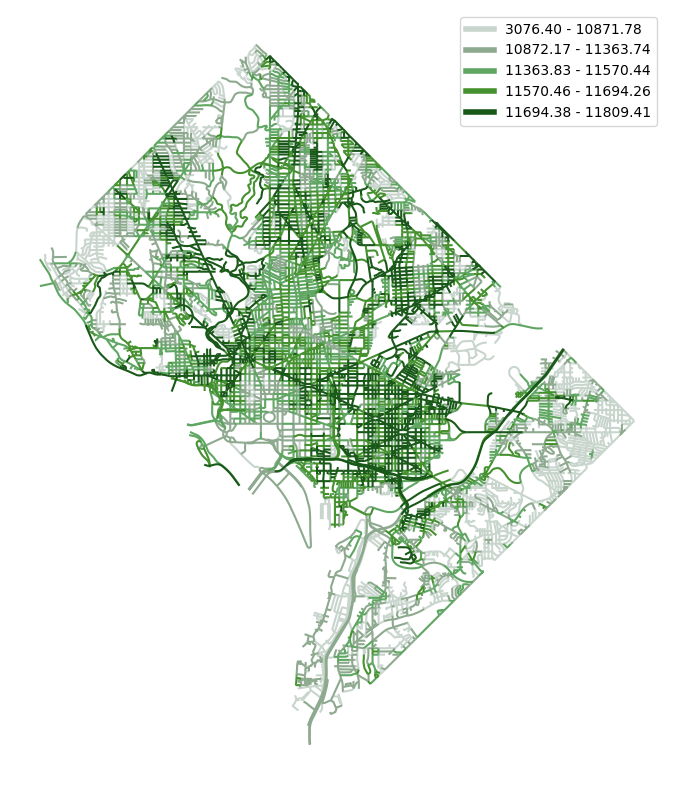

In [ ]:
# Compute quantile breaks
quantiles = gdf['C_simi_CB'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['C_simi_CB_category'] = pd.cut(gdf['C_simi_CB'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#c8d5cd',
    1: '#8da98e',
    2: '#5ea662',
    3: '#45912f',
    4: '#185818'
}

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    gdf[gdf['C_simi_CB_category'] == category].plot(ax=ax, color=color, label=f'Category {category}')

# Display the count and value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['C_simi_CB_category'] == category].shape[0]
    min_value = gdf[gdf['C_simi_CB_category'] == category]['C_simi_CB'].min()
    max_value = gdf[gdf['C_simi_CB_category'] == category]['C_simi_CB'].max()
    category_stats.append((category, count, min_value, max_value))

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value}, {max_value}]")

# Remove coordinate borders
ax.axis('off')
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by C_simi_CB categories using Quantiles')
plt.show()


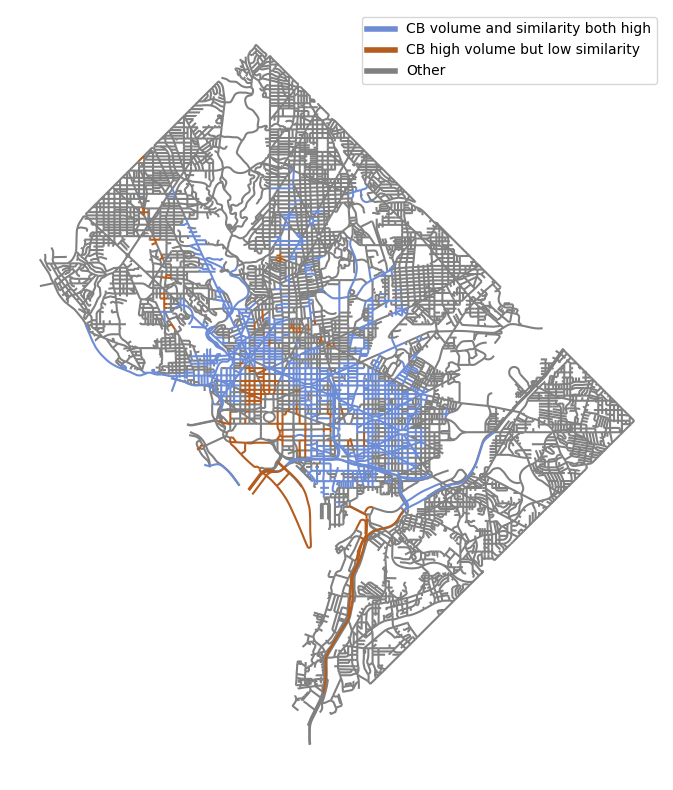

Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): 1878
Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): 232


In [ ]:
sum_CB_quantiles20 = gdf['sum_CB'].quantile([0.3]).values[0]
sum_CB_quantiles80 = gdf['sum_CB'].quantile([0.7]).values[0]
C_simi_CB_quantiles_20 = gdf['C_simi_CB'].quantile([0.3]).values[0]
C_simi_CB_quantiles_80 = gdf['C_simi_CB'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_CB'] >= sum_CB_quantiles80 and row['C_simi_CB'] >= C_simi_CB_quantiles_80:
        return '#6d8cd4'
    elif row['sum_CB'] >= sum_CB_quantiles80 and row['C_simi_CB'] <= C_simi_CB_quantiles_20:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='CB volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='CB high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
# Remove coordinate borders
ax.axis('off')
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by specific conditions')
plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): {count_blue}")
print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): {count_red}")


In [ ]:
drivepath = "four_modes_8period.geojson"
gdf = gpd.read_file(drivepath)

Rows with sum_ST equal to 0: 1365
       LS_D1  LS_D2  LS_D3  LS_D4  LB_D1  LB_D2  LB_D3  LB_D4  ST_D1  ST_D2  \
3         11     45     30      9      2      9     21      7      0      0   
20         0      0      2      0      0      3      6      5      0      0   
49         0      0      0      0      0      0      0      0      0      0   
95        11     33     25     11      4      7      6      4      0      0   
101        1      3      0      5      0      3      3      3      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13797      5     13      4      0      6     20      0      0      0      0   
13800      0      0      0      0      0      0      2      0      0      0   
13805      0      0      0      1      0      1      1      0      0      0   
13806      2     10      6      4      8     18     15     10      0      0   
13814      4     11      7      4      5      4      4      4      0      0   

       ...  ST_Y1

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


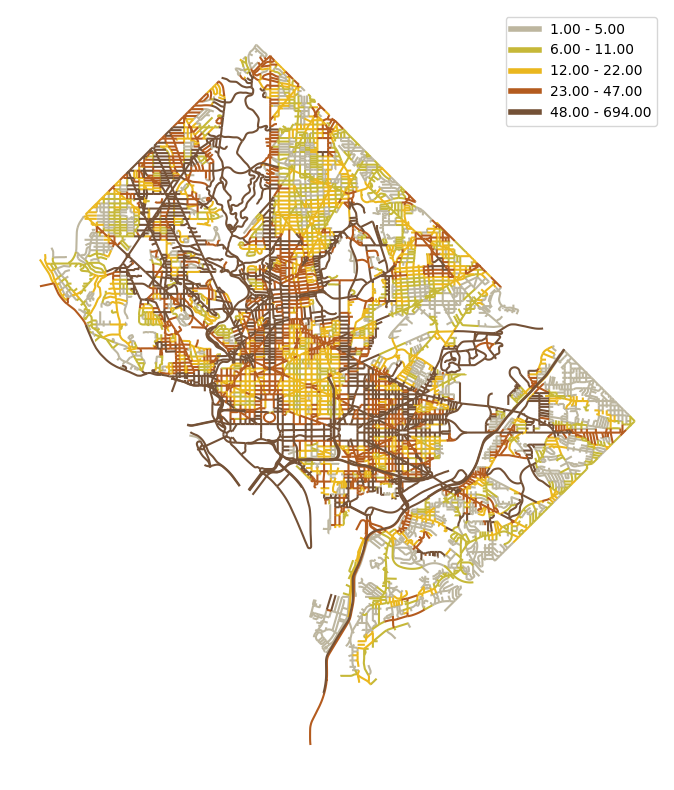

Category 0: Count = 2895, Value Range = [1.00, 5.00]
Category 1: Count = 2155, Value Range = [6.00, 11.00]
Category 2: Count = 2523, Value Range = [12.00, 22.00]
Category 3: Count = 2402, Value Range = [23.00, 47.00]
Category 4: Count = 2476, Value Range = [48.00, 694.00]


In [ ]:
gdf['sum_ST'] = gdf[['ST_D1', 'ST_D2', 'ST_D3', 'ST_D4',
           'ST_Y1', 'ST_Y2', 'ST_Y3', 'ST_Y4']].sum(axis=1)

zero_rows = gdf[gdf['sum_ST'] == 0]
print(f"Rows with sum_ST equal to 0: {len(zero_rows)}")
print(zero_rows)

gdf = gdf[gdf['sum_ST'] != 0].copy()

gdf['centroid'] = gdf['geometry'].centroid

gdf['centroid_y'] = gdf['centroid'].apply(lambda point: point.y)


gdf = gdf[gdf['centroid_y'] > 128000]

# Compute quantile breaks
quantiles = gdf['sum_ST'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['sum_ST_category'] = pd.cut(gdf['sum_ST'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#bdb69f',
    1: '#c6b838',
    2: '#eab71e',
    3: '#b45b1e',
    4: '#745136'
}

# Compute the value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['sum_ST_category'] == category].shape[0]
    min_value = gdf[gdf['sum_ST_category'] == category]['sum_ST'].min()
    max_value = gdf[gdf['sum_ST_category'] == category]['sum_ST'].max()
    category_stats.append((category, count, min_value, max_value))

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    category_data = gdf[gdf['sum_ST_category'] == category]
    category_label = f'{category_stats[category][2]:.2f} - {category_stats[category][3]:.2f}'
    category_data.plot(ax=ax, color=color, label=category_label)
# Remove coordinate borders
ax.axis('off')
# Create custom legend
legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by sum_ST categories using Quantiles')
plt.show()

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value:.2f}, {max_value:.2f}]")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


columns = ['ST_D1', 'ST_D2', 'ST_D3', 'ST_D4',
           'ST_Y1', 'ST_Y2', 'ST_Y3', 'ST_Y4'
           ]

data = gdf[columns]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

cosine_sim_matrix = cosine_similarity(normalized_data)

C_similarity = cosine_sim_matrix.sum(axis=1) - 1

gdf['C_simi_ST'] = C_similarity


Category 0: Count = 2551, Value Range = [868.9374789623407, 4445.978409797757]
Category 1: Count = 2432, Value Range = [4446.883842194031, 6005.964287906838]
Category 2: Count = 2488, Value Range = [6008.339627387379, 7001.939411173256]
Category 3: Count = 2490, Value Range = [7002.570000324352, 7681.242825069818]
Category 4: Count = 2490, Value Range = [7682.139388173484, 8553.18824601531]


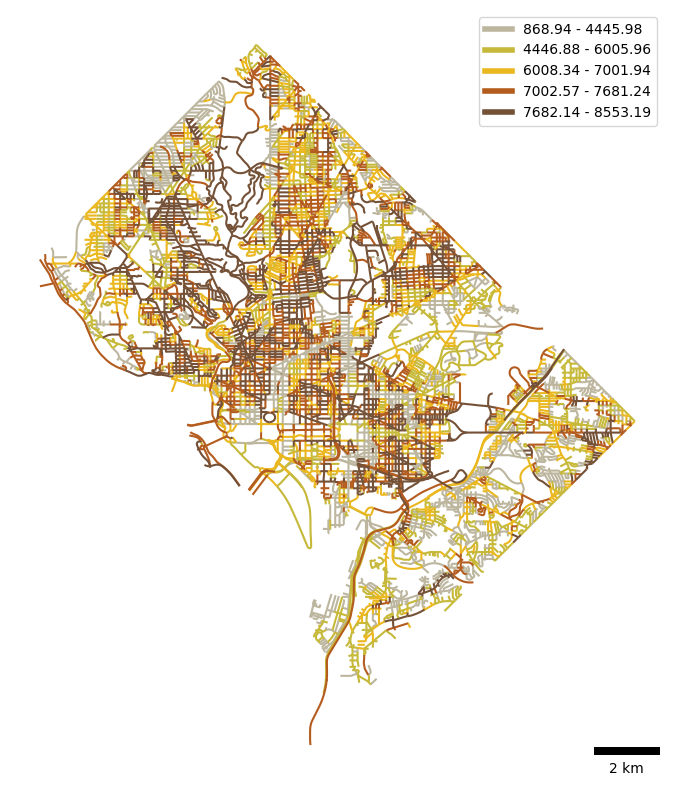

In [ ]:
# Compute quantile breaks
quantiles = gdf['C_simi_ST'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['C_simi_ST_category'] = pd.cut(gdf['C_simi_ST'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#bdb69f',
    1: '#c6b838',
    2: '#eab71e',
    3: '#b45b1e',
    4: '#745136'
}

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    gdf[gdf['C_simi_ST_category'] == category].plot(ax=ax, color=color, label=f'Category {category}')



# Display the count and value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['C_simi_ST_category'] == category].shape[0]
    min_value = gdf[gdf['C_simi_ST_category'] == category]['C_simi_ST'].min()
    max_value = gdf[gdf['C_simi_ST_category'] == category]['C_simi_ST'].max()
    category_stats.append((category, count, min_value, max_value))

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value}, {max_value}]")

# # Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
ax.add_artist(scalebar)

# Remove coordinate borders
ax.axis('off')

legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)

# plt.title('Geometry colored by C_simi_ST categories using Quantiles')
plt.show()



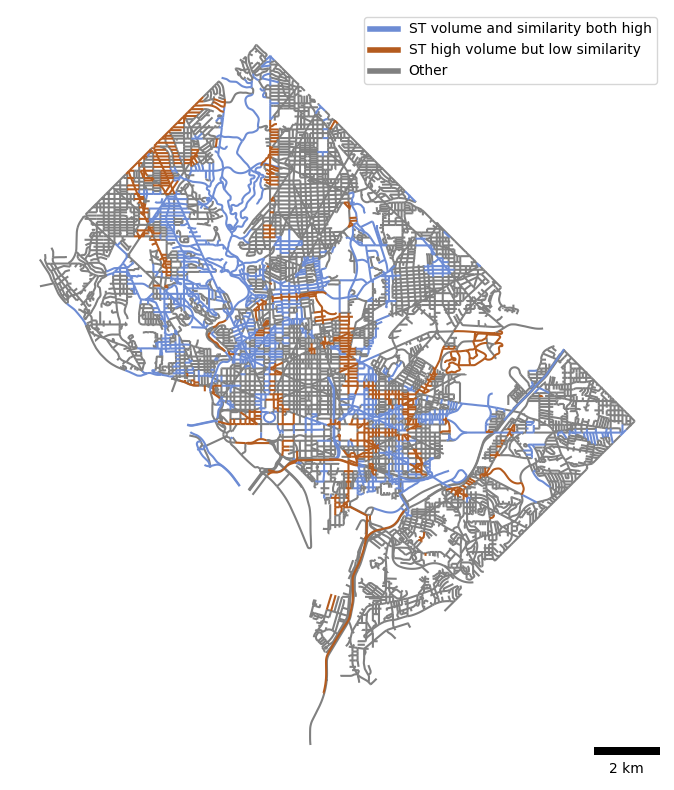

Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): 1896
Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): 1047


In [ ]:
sum_ST_quantiles20 = gdf['sum_ST'].quantile([0.3]).values[0]
sum_ST_quantiles80 = gdf['sum_ST'].quantile([0.7]).values[0]
C_simi_ST_quantiles_20 = gdf['C_simi_ST'].quantile([0.3]).values[0]
C_simi_ST_quantiles_80 = gdf['C_simi_ST'].quantile([0.7]).values[0]

def assign_color(row):
    if row['sum_ST'] >= sum_ST_quantiles80 and row['C_simi_ST'] >= C_simi_ST_quantiles_80:
        return '#6d8cd4'
    elif row['sum_ST'] >= sum_ST_quantiles80 and row['C_simi_ST'] <= C_simi_ST_quantiles_20:
        return '#b45b1e'
    else:
        return 'gray'

gdf['color'] = gdf.apply(assign_color, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for color in gdf['color'].unique():
    gdf[gdf['color'] == color].plot(ax=ax, color=color, label=color)

legend_elements = [Line2D([0], [0], color='#6d8cd4', lw=4, label='ST volume and similarity both high'),
                   Line2D([0], [0], color='#b45b1e', lw=4, label='ST high volume but low similarity'),
                   Line2D([0], [0], color='gray', lw=4, label='Other')]
# # Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
ax.add_artist(scalebar)

# Remove coordinate borders
ax.axis('off')

ax.legend(handles=legend_elements)
# plt.title('Geometry colored by specific conditions')
plt.show()

count_blue = gdf[gdf['color'] == '#6d8cd4'].shape[0]
count_red = gdf[gdf['color'] == '#b45b1e'].shape[0]

print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Top 20% (blue): {count_blue}")
print(f"Number of geometries with sum_LS Top 20% & C_simi_LS Bottom 20% (red): {count_red}")


In [ ]:
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections
import torch

from scipy.cluster.vq import kmeans2, whiten
from scipy.spatial.distance import cdist

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023LIME_escooter/escooter2023_trajectory_hourly_count.shp"
gdf = gpd.read_file(drivepath)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023LIME_bike/limebike2023_trajectory_hourly_count.shp"
gdf2 = gpd.read_file(drivepath)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023capitalbike/capitalbike2023_trajectory_hourly_count.shp"
gdf3 = gpd.read_file(drivepath)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/2023Allyear_strava/strava2023_trajectory_hourly_count.shp"
gdf4 = gpd.read_file(drivepath)

In [ ]:
columns_to_convert = [
    'All_D_1', 'All_D_2', 'All_D_3', 'All_D_4', 'All_D_5', 'All_D_6', 'All_D_7', 'All_D_8', 'All_D_9',
    'All_D_10', 'All_D_11', 'All_D_12', 'All_D_13', 'All_D_14', 'All_D_15', 'All_D_16', 'All_D_17', 'All_D_18', 'All_D_19',
    'All_D_20', 'All_D_21', 'All_D_22', 'All_D_23', 'All_D_0', 'All_Y_1', 'All_Y_2', 'All_Y_3', 'All_Y_4', 'All_Y_5',
    'All_Y_6', 'All_Y_7', 'All_Y_8', 'All_Y_9', 'All_Y_10', 'All_Y_11', 'All_Y_12', 'All_Y_13', 'All_Y_14', 'All_Y_15',
    'All_Y_16', 'All_Y_17', 'All_Y_18', 'All_Y_19', 'All_Y_20', 'All_Y_21', 'All_Y_22', 'All_Y_23', 'All_Y_0'
]

def process_gdf(gdf, new_column_name):
    for col in columns_to_convert:
        gdf[col] = pd.to_numeric(gdf[col], errors='coerce')
    gdf[new_column_name] = gdf[columns_to_convert].sum(axis=1)
    return gdf[[new_column_name, 'geometry']]

gdf = process_gdf(gdf, 'escooter_2023')
gdf2 = process_gdf(gdf2, 'limebike_2023')
gdf3 = process_gdf(gdf3, 'capitalbike_2023')
gdf4 = process_gdf(gdf4, 'strava_2023')


KeyError: 'All_D_1'

In [ ]:
geometry = gdf[['geometry']].copy()
gdf.drop(columns='geometry', inplace=True)
gdf2.drop(columns='geometry', inplace=True)
gdf3.drop(columns='geometry', inplace=True)
gdf4.drop(columns='geometry', inplace=True)

gdf_all = pd.concat([gdf, gdf2, gdf3, gdf4, geometry], axis=1)

gdf_all = gpd.GeoDataFrame(gdf_all, geometry='geometry')

gdf_all.reset_index(drop=True, inplace=True)

print(gdf_all)

       escooter_2023  limebike_2023  capitalbike_2023  strava_2023  \
0                299            128              1272           21   
1              60958          32856            191725           27   
2               2426            839              2575           32   
3                325             96                 0            0   
4                 80             38               601           22   
...              ...            ...               ...          ...   
13812           3627           2442              3315           65   
13813            440            522               419            7   
13814            115            113               376            0   
13815          34587          13086             81120           33   
13816            640             46                 0            2   

                                                geometry  
0      LINESTRING Z (397105.011 146144.556 0.000, 397...  
1      LINESTRING Z (396929.591 137710.49

In [ ]:
gdf_all = gdf_all.drop(index=5242)

In [ ]:
# 计算每列的总和
total_escooter = gdf_all['escooter_2023'].sum()
total_limebike = gdf_all['limebike_2023'].sum()
total_capitalbike = gdf_all['capitalbike_2023'].sum()
total_strava = gdf_all['strava_2023'].sum()

# 生成新的比例列
gdf_all['escooter_2023P'] = gdf_all['escooter_2023'] / total_escooter
gdf_all['limebike_2023P'] = gdf_all['limebike_2023'] / total_limebike
gdf_all['capitalbike_2023P'] = gdf_all['capitalbike_2023'] / total_capitalbike
gdf_all['strava_2023P'] = gdf_all['strava_2023'] / total_strava

# 显示结果
print(gdf_all)


       escooter_2023  limebike_2023  capitalbike_2023  strava_2023  \
0                299            128              1272           21   
1              60958          32856            191725           27   
2               2426            839              2575           32   
3                325             96                 0            0   
4                 80             38               601           22   
...              ...            ...               ...          ...   
13812           3627           2442              3315           65   
13813            440            522               419            7   
13814            115            113               376            0   
13815          34587          13086             81120           33   
13816            640             46                 0            2   

                                                geometry  escooter_2023P  \
0      LINESTRING Z (397105.011 146144.556 0.000, 397...    2.794351e-06   
1      

In [ ]:
# 重命名列
gdf_all.rename(columns={
    'escooter_2023': 'esc_2023',
    'limebike_2023': 'lim_2023',
    'capitalbike_2023': 'cap_2023',
    'strava_2023': 'str_2023',
    'escooter_2023P': 'esc_P',
    'limebike_2023P': 'lim_P',
    'capitalbike_2023P': 'cap_P',
    'strava_2023P': 'str_P'
}, inplace=True)

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/Allmodes_total_count.shp"
gdf_all.to_file(drivepath, driver='ESRI Shapefile')

In [ ]:
gdf=gdf_all

Rows with sum_2023 equal to 0: 83
       esc_2023  lim_2023  cap_2023  str_2023  esc_P  lim_P  cap_P  str_P  \
49            0         0         0         0    0.0    0.0    0.0    0.0   
177           0         0         0         0    0.0    0.0    0.0    0.0   
231           0         0         0         0    0.0    0.0    0.0    0.0   
565           0         0         0         0    0.0    0.0    0.0    0.0   
2777          0         0         0         0    0.0    0.0    0.0    0.0   
...         ...       ...       ...       ...    ...    ...    ...    ...   
13545         0         0         0         0    0.0    0.0    0.0    0.0   
13651         0         0         0         0    0.0    0.0    0.0    0.0   
13673         0         0         0         0    0.0    0.0    0.0    0.0   
13773         0         0         0         0    0.0    0.0    0.0    0.0   
13778         0         0         0         0    0.0    0.0    0.0    0.0   

                                         

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


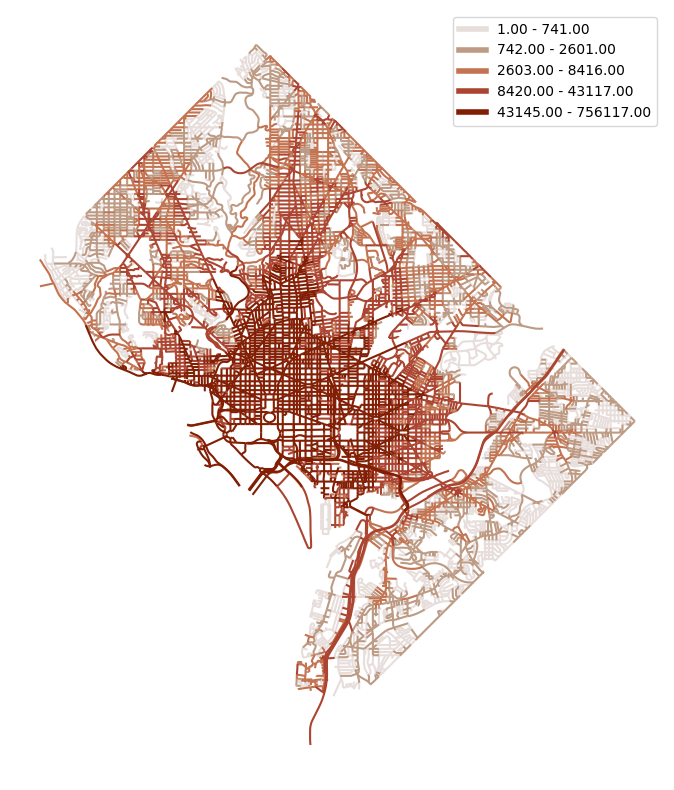

Category 0: Count = 2742, Value Range = [1.00, 741.00]
Category 1: Count = 2738, Value Range = [742.00, 2601.00]
Category 2: Count = 2742, Value Range = [2603.00, 8416.00]
Category 3: Count = 2738, Value Range = [8420.00, 43117.00]
Category 4: Count = 2740, Value Range = [43145.00, 756117.00]


In [ ]:
gdf['sum_2023'] = gdf[['esc_2023', 'lim_2023', 'cap_2023', 'str_2023']].sum(axis=1)

zero_rows = gdf[gdf['sum_2023'] == 0]
print(f"Rows with sum_2023 equal to 0: {len(zero_rows)}")
print(zero_rows)

gdf = gdf[gdf['sum_2023'] != 0].copy()
gdf['centroid'] = gdf['geometry'].centroid

gdf['centroid_y'] = gdf['centroid'].apply(lambda point: point.y)


gdf = gdf[gdf['centroid_y'] > 128000]

# Compute quantile breaks
quantiles = gdf['sum_2023'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['sum_2023_category'] = pd.cut(gdf['sum_2023'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#e7dddb',
    1: '#bd9a83',
    2: '#c37350',
    3: '#ab4430',
    4: '#821e03'
}

# Compute the value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['sum_2023_category'] == category].shape[0]
    min_value = gdf[gdf['sum_2023_category'] == category]['sum_2023'].min()
    max_value = gdf[gdf['sum_2023_category'] == category]['sum_2023'].max()
    category_stats.append((category, count, min_value, max_value))

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    category_data = gdf[gdf['sum_2023_category'] == category]
    category_label = f'{category_stats[category][2]:.2f} - {category_stats[category][3]:.2f}'
    category_data.plot(ax=ax, color=color, label=category_label)

# Remove coordinate borders
ax.axis('off')

legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by sum_2023 categories using Quantiles')
plt.show()

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value:.2f}, {max_value:.2f}]")

In [ ]:
#cosine

In [ ]:
drivepath = "/content/drive/MyDrive/Colab Notebooks/Dan/four_modes_8period.geojson"
gdf = gpd.read_file(drivepath)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


columns = ['LS_D1', 'LS_D2', 'LS_D3', 'LS_D4',
           'LB_D1', 'LB_D2', 'LB_D3', 'LB_D4',
           'ST_D1', 'ST_D2', 'ST_D3', 'ST_D4',
           'CB_D1', 'CB_D2', 'CB_D3', 'CB_D4',
           'LS_Y1', 'LS_Y2', 'LS_Y3', 'LS_Y4',
           'LB_Y1', 'LB_Y2', 'LB_Y3', 'LB_Y4',
           'ST_Y1', 'ST_Y2', 'ST_Y3', 'ST_Y4',
           'CB_Y1', 'CB_Y2', 'CB_Y3', 'CB_Y4']

data = gdf[columns]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

cosine_sim_matrix = cosine_similarity(normalized_data)

C_similarity = cosine_sim_matrix.sum(axis=1) - 1

gdf['C_similarity'] = C_similarity


In [ ]:
normalized_df = pd.DataFrame(normalized_data, columns=columns)

print("Min values of each column after normalization:")
print(normalized_df.min())

print("\nMax values of each column after normalization:")
print(normalized_df.max())

Min values of each column after normalization:
LS_D1    0.0
LS_D2    0.0
LS_D3    0.0
LS_D4    0.0
LB_D1    0.0
LB_D2    0.0
LB_D3    0.0
LB_D4    0.0
ST_D1    0.0
ST_D2    0.0
ST_D3    0.0
ST_D4    0.0
CB_D1    0.0
CB_D2    0.0
CB_D3    0.0
CB_D4    0.0
LS_Y1    0.0
LS_Y2    0.0
LS_Y3    0.0
LS_Y4    0.0
LB_Y1    0.0
LB_Y2    0.0
LB_Y3    0.0
LB_Y4    0.0
ST_Y1    0.0
ST_Y2    0.0
ST_Y3    0.0
ST_Y4    0.0
CB_Y1    0.0
CB_Y2    0.0
CB_Y3    0.0
CB_Y4    0.0
dtype: float64

Max values of each column after normalization:
LS_D1    1.0
LS_D2    1.0
LS_D3    1.0
LS_D4    1.0
LB_D1    1.0
LB_D2    1.0
LB_D3    1.0
LB_D4    1.0
ST_D1    1.0
ST_D2    1.0
ST_D3    1.0
ST_D4    1.0
CB_D1    1.0
CB_D2    1.0
CB_D3    1.0
CB_D4    1.0
LS_Y1    1.0
LS_Y2    1.0
LS_Y3    1.0
LS_Y4    1.0
LB_Y1    1.0
LB_Y2    1.0
LB_Y3    1.0
LB_Y4    1.0
ST_Y1    1.0
ST_Y2    1.0
ST_Y3    1.0
ST_Y4    1.0
CB_Y1    1.0
CB_Y2    1.0
CB_Y3    1.0
CB_Y4    1.0
dtype: float64


In [ ]:
negative_ones = gdf[gdf['C_similarity'] == -1]
print(f"Rows with -1 C_similarity: {len(negative_ones)}")
print(negative_ones)

Rows with -1 C_similarity: 90
       LS_D1  LS_D2  LS_D3  LS_D4  LB_D1  LB_D2  LB_D3  LB_D4  ST_D1  ST_D2  \
49         0      0      0      0      0      0      0      0      0      0   
177        0      0      0      0      0      0      0      0      0      0   
231        0      0      0      0      0      0      0      0      0      0   
565        0      0      0      0      0      0      0      0      0      0   
2777       0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13546      0      0      0      0      0      0      0      0      0      0   
13652      0      0      0      0      0      0      0      0      0      0   
13674      0      0      0      0      0      0      0      0      0      0   
13774      0      0      0      0      0      0      0      0      0      0   
13779      0      0      0      0      0      0      0      0      0      0   

       ...  ST_Y2  ST

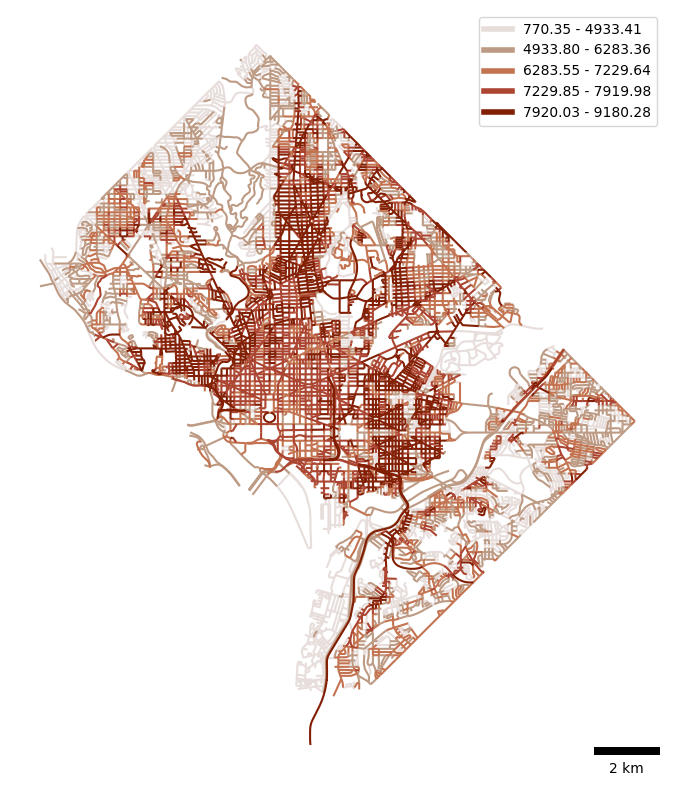

Category 0: Count = 2739, Value Range = [770.35, 4933.41]
Category 1: Count = 2738, Value Range = [4933.80, 6283.36]
Category 2: Count = 2739, Value Range = [6283.55, 7229.64]
Category 3: Count = 2738, Value Range = [7229.85, 7919.98]
Category 4: Count = 2739, Value Range = [7920.03, 9180.28]


In [ ]:
#all modes

gdf = gdf[gdf['C_similarity'] != -1].copy()

gdf['centroid'] = gdf['geometry'].centroid

gdf['centroid_y'] = gdf['centroid'].apply(lambda point: point.y)


gdf = gdf[gdf['centroid_y'] > 128000]

# Compute quantile breaks
quantiles = gdf['C_similarity'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Assign categories based on the quantiles
gdf['C_similarity_category'] = pd.cut(gdf['C_similarity'], bins=quantiles, labels=False, include_lowest=True)

# Define the colors for each category
colors = {
    0: '#e7dddb',
    1: '#bd9a83',
    2: '#c37350',
    3: '#ab4430',
    4: '#821e03'
}

# Compute the value range for each category
category_stats = []
for category in range(5):
    count = gdf[gdf['C_similarity_category'] == category].shape[0]
    min_value = gdf[gdf['C_similarity_category'] == category]['C_similarity'].min()
    max_value = gdf[gdf['C_similarity_category'] == category]['C_similarity'].max()
    category_stats.append((category, count, min_value, max_value))

# Plot the GeoDataFrame with colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for category, color in colors.items():
    category_data = gdf[gdf['C_similarity_category'] == category]
    category_label = f'{category_stats[category][2]:.2f} - {category_stats[category][3]:.2f}'
    category_data.plot(ax=ax, color=color, label=category_label)

# # Add scale bar
scalebar = ScaleBar(1, location='lower right')  # 1 unit in your CRS corresponds to 1 meter
ax.add_artist(scalebar)
# Remove coordinate borders
ax.axis('off')

legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'{category_stats[cat][2]:.2f} - {category_stats[cat][3]:.2f}') for cat, color in colors.items()]
ax.legend(handles=legend_elements)
# plt.title('Geometry colored by C_similarity categories using Quantiles')
plt.show()

# Print the category statistics
for category, count, min_value, max_value in category_stats:
    print(f"Category {category}: Count = {count}, Value Range = [{min_value:.2f}, {max_value:.2f}]")